# Пример 3

In [1]:
import numpy as np

Рассмотрим игру в нормальной форме с матрицами
\begin{align*}
    A&=\begin{pmatrix} 6 & 4 \\ 8 & 3 \end{pmatrix} &
    B&=\begin{pmatrix} 3 & 5 \\ 3 & 2 \end{pmatrix}
\end{align*}
или в виде таблицы

| | $s_{-1}$ | $s_{-2}$ |
|--|---|---|
|$s_1$| (6,3) | (4,5)|
|$s_2$| (8,3) | (3,2)|

In [2]:
# Pay-off matrices
A = np.array([ [6, 4], [8, 3] ])
B = np.array([ [3, 5], [3, 2] ])
A, B

(array([[6, 4],
        [8, 3]]),
 array([[3, 5],
        [3, 2]]))

## Ожидаемый выигрыш
Предположим, что игроки следуют смешанным стратегиям 
\begin{align*}
    P^\top&=\begin{pmatrix} 0.7 & 0.3\end{pmatrix} & 
    Q^\top&=\begin{pmatrix} 0.4 & 0.6\end{pmatrix}.
\end{align*}    
Ожидаемый выигрыш каждого из игроков:

- Ожидаемый выигрыш первого $EU_A(P,Q)=P^\top AQ$
- Ожидаемый выигрыш второго $EU_B(P,Q)=P^\top BQ$

In [3]:
P = np.array([0.7, 0.3])
Q = np.array([0.4, 0.6])
# Ожидаемый выигрыш. @ - матричное умножение в numpy
P.T@A@Q, P.T@B@Q

(4.859999999999999, 3.6599999999999993)

## Статистические испытания
Разыграем игровую ситуацию 1000 раз

In [4]:
# Число итераций
n_iter = 1000
# Инициализация случайных генераторов
rng_P = np.random.default_rng(seed=1)
rng_Q = np.random.default_rng(seed=2)
# Генерируем выбор игроков
player1 = rng_P.choice(a=np.arange(P.shape[0]), size=n_iter, p=P)
player2 = rng_Q.choice(a=np.arange(Q.shape[0]), size=n_iter, p=Q)
U1 = np.array([])
U2 = np.array([])
for i in range(n_iter):
    U1 = np.append( U1, A[player1[i],player2[i]] )
    U2 = np.append( U2, B[player1[i],player2[i]] )
U1.mean(), U2.mean()

(4.863, 3.653)

Визуализация

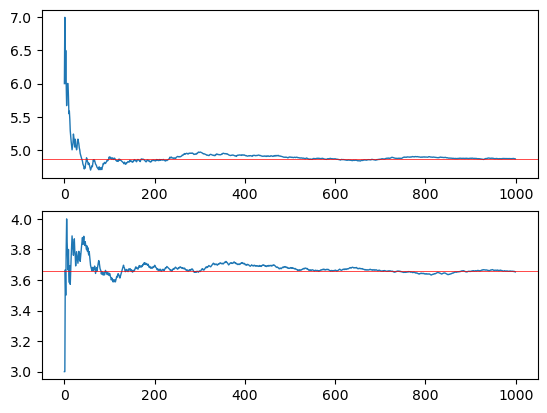

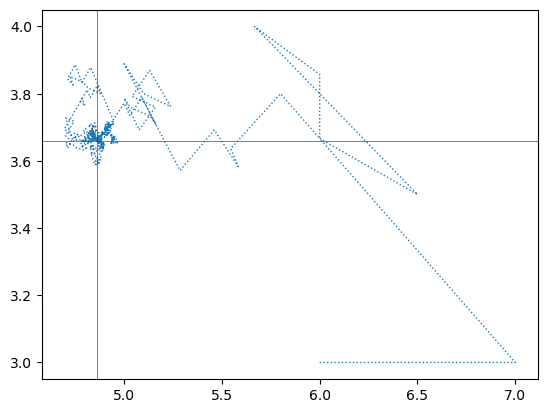

In [5]:
import matplotlib.pyplot as plt
cum_mean1 = np.array(U1[0])
cum_mean2 = np.array(U2[0])
for i in range(2,n_iter+1):
    cum_mean1 = np.append(cum_mean1, sum(U1[:i])/i )
    cum_mean2 = np.append(cum_mean2, sum(U2[:i])/i )

# Plots

x = np.arange(start=0, stop=n_iter, step=1)

fig, ax = plt.subplots(2,1)

ax[0].plot(x, cum_mean1, linewidth=1.0)
ax[1].plot(x, cum_mean2, linewidth=1.0)

ax[0].axhline(y=P.T@A@Q, color='r', linewidth=.5)
ax[1].axhline(y=P.T@B@Q, color='r', linewidth=.5)

plt.show()
    
# scatter plot
fig, ax = plt.subplots()

ax.plot(cum_mean1, cum_mean2, linewidth=1.0, linestyle=':')

ax.axhline(y=P.T@B@Q, color='r', linewidth=.5)
ax.axvline(x=P.T@A@Q, color='r', linewidth=.5)

plt.show()